# Holophenotype clustermap

> Fill in a module description here

In [1]:
#| default_exp 04_Holophenotype_Dendrogram

In [2]:
#| hide
from nbdev.showdoc import *

In [49]:
#| export
# import svgutils
# from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Inter', 6)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams['svg.fonttype'] = 'none'
import pickle
%run spiral_heatmap.ipynb
import dabest
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import esploco.plotTools as plotTools
plotTools.setFont('inter', 9)

%run '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/02_helper/Gdocs API/writepdtogoogledocs.ipynb'
SPREADSHEET_ID = '1bfGN-K6iH7GY6251Gcr82kYUqRVCrMzLB9npzBWjuC4'


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=353793915331-eqquk98jeo8d5s9hi7dn9p934k92m04t.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A55456%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets&state=ikB8PaNND9c4HWO06UED3MbcPvBv3Y&access_type=offline


In [2]:

%matplotlib inline

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure5exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace('CsCh','Chr')
fullMetaData['Expt'] = fullMetaData['Expt'].str.replace(' hr',' h')
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])

w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 h starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 h reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 h starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 h reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = pd.concat([fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index), pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)]).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data
fullMetaData1 = fullMetaData.drop([8, 19])


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_60363/3305877022.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


In [3]:
fullMetaData1


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,Trhn>Chr,TrhCsCh_ele.csv,main5HT,deltadelta,24,Starved,98.0
1,R50H05>Chr,R50CsCh_ele.csv,main5HT,deltadelta,0,Fed,130.0
2,Trhn>ACR1,TrhACRRound2_ele.csv,main5HT,deltadelta,0,Fed,79.0
3,R50H05>ACR1,R50ACRRound2_ele.csv,main5HT,deltadelta,0,Fed,58.0
4,Trhn>VNC-Chr,TrhVNCCsCh_ele.csv,intersection,deltadelta,24,Starved,116.0
5,Trhn>VNC-ACR1,TrhVNCACR1_ele.csv,intersection,deltadelta,0,Fed,77.0
6,SXVNC1>Chr,SXVNC1CsCh_ele.csv,novelSplits,deltadelta,24,Starved,66.0
7,SXVNC2>Chr,SXVNC2CsCh_ele.csv,novelSplits,deltadelta,24,Starved,110.0
9,SXVNC2>ACR1,SXVNC2ACR1_ele.csv,novelSplits,deltadelta,0,Fed,28.0
10,(Trhn - R50H05)>Chr,RLTG_ele.csv,intersection,delta,24,Starved,40.0


# Take a look at the meta data for the whole dataset

In [4]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        print(expts.iloc[i].Expt)
        # print(metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'])
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
            # contrast_vector[0].mean_diff.plot()
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)   
            # contrast_vector[0].mean_diff.plot()

        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection


In [5]:
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData1, 'Group', ['wildtype', 'main5HT', 'metaReview', 'intersection', 'novelSplits'], vectorselection)
expt

Trhn>Chr
R50H05>Chr
Trhn>ACR1
R50H05>ACR1
Trhn>VNC-Chr
Trhn>VNC-ACR1
SXVNC1>Chr
SXVNC2>Chr
SXVNC2>ACR1
(Trhn - R50H05)>Chr
(R50H05 - Trhn)>Chr
Trhn>Brain-Chr
NPF>Chr
NPF>ACR1
AKH3>Chr
AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1
24 h starved
24 h reversed
48 h starved
48 h reversed


['Trhn>Chr',
 'R50H05>Chr',
 'Trhn>ACR1',
 'R50H05>ACR1',
 'Trhn>VNC-Chr',
 'Trhn>VNC-ACR1',
 'SXVNC1>Chr',
 'SXVNC2>Chr',
 'SXVNC2>ACR1',
 '(Trhn - R50H05)>Chr',
 '(R50H05 - Trhn)>Chr',
 'Trhn>Brain-Chr',
 'NPF>Chr',
 'NPF>ACR1',
 'AKH3>Chr',
 'AKH2>ACR1',
 'Dilp2>Chr',
 'Dilp2>ACR1',
 '24 h starved',
 '24 h reversed',
 '48 h starved',
 '48 h reversed']

In [55]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
#             print(vectorselection[j])
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)

gDf  = gDf.rename(index = {'AKH3>Chr':'Akh>Chr', 'AKH2>ACR1':'Akh>ACR1',
                           'Dilp2>Chr':'Ilp2>Chr', 'Dilp2>ACR1':'Ilp2>ACR1', 
                           '(R50H05 - Trhn)>Chr':'R50H05-NOT-Trhn>Chr', 
                           '(Trhn - R50H05)>Chr':'Trhn-NOT-R50H05>Chr', 
                           'Trhn>VNC-Chr':'Trhn-AND-tsh>Chr','Trhn>VNC-ACR1':'Trhn-AND-tsh>ACR1',
                           'Trhn>Brain-Chr':'Trhn-NOT-tsh>Chr'})


Trhn>Chr
R50H05>Chr
Trhn>ACR1
R50H05>ACR1
Trhn>VNC-Chr
Trhn>VNC-ACR1
SXVNC1>Chr
SXVNC2>Chr
SXVNC2>ACR1
(Trhn - R50H05)>Chr
(R50H05 - Trhn)>Chr
Trhn>Brain-Chr
NPF>Chr
NPF>ACR1
AKH3>Chr
AKH2>ACR1
Dilp2>Chr
Dilp2>ACR1
24 h starved
24 h reversed
48 h starved
48 h reversed


In [56]:
import pandas as pd

def rearrange_dataframe(df, new_column_order=None, new_row_order=None):
    """
    Rearrange DataFrame columns and rows based on new indices
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    new_column_order (list): New order of column names
    new_row_order (list): New order of row indices
    
    Returns:
    pandas.DataFrame: Rearranged DataFrame
    """
    # Create a copy to avoid modifying the original
    result = df.copy()
    
    # Rearrange columns if new order is provided
    if new_column_order is not None:
        result = result[new_column_order]
    
    # Rearrange rows if new order is provided
    if new_row_order is not None:
        result = result.loc[new_row_order]
    
    return result



In [57]:
gDf.to_csv(figurepath+'/gDf.csv')
gDf1 = gDf.copy()
gDf1.insert(0, '', gDf1.index)

write_results_table(SPREADSHEET_ID, 'Figure 5D', gDf1, sheet = 'Figure 5', starting_row = None)


96


121


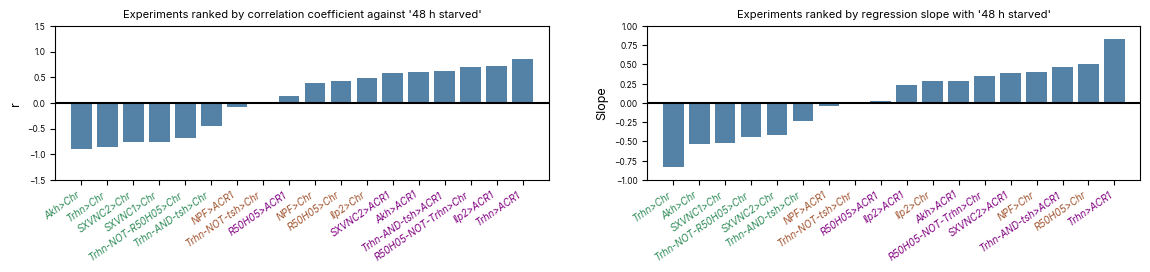

In [60]:
metricAbb = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/metricAbb.csv', index_col = 0)
setFont('inter', 6)
statsDf = pd.DataFrame(data = [], index = gDf.index, columns = ['Slope', 'Intercept', 'r', 'p', 'std_err'])
import scipy
for i in gDf.index:
    statsDf.loc[i, ['Slope', 'Intercept', 'r', 'p', 'std_err']] = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc[i])
statsDf['Slope_str'] = statsDf['Slope'].map("{:.2f}".format)
statsDf['r_str'] = statsDf['r'].map("{:.2f}".format)
statsDfdrop = statsDf.drop(index = ['24 h starved', '24 h reversed', '48 h starved', '48 h reversed'])

frankcoor, axes = plt.subplots(1, 2)
frankcoor.set_size_inches(14, 2)
# sns.heatmap(corr_red, center=0, vmin = -1, vmax = 1, cmap = 'vlag',
#             square=True, linewidths=.5, cbar_kws={"shrink": .4,}, ax = ax)

sns.barplot(x = statsDfdrop.sort_values(by = 'r', ascending = True,).index, y = statsDfdrop.sort_values(by = 'r')['r'], ax = axes[0], color = 'steelblue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 7, rotation = 35, ha = 'right')
axes[0].plot([-1,18], [0, 0], 'k')
axes[0].set_xlim([-1,18])
axes[0].set_ylim([-1.5,1.5])
axes[0].set_ylabel('r', fontsize = 9)
xtl = axes[0].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
for i in range(len(xtl)):
    xtl[i].set_color(clustercolors.loc[xtl[i].get_text()]['cluster color'])

axes[0].set_title('Experiments ranked by correlation coefficient against \'48 h starved\'', fontsize = 8)




sns.barplot(x = statsDfdrop.sort_values(by = 'Slope', ascending = True,).index, y = statsDfdrop.sort_values(by = 'Slope')['Slope'], ax = axes[1], color = 'steelblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 7 ,rotation = 35, ha = 'right')
axes[1].plot([-1,18], [0, 0], 'k')
axes[1].set_xlim([-1,18])
axes[1].set_ylim([-1,1])
axes[1].set_ylabel('Slope', fontsize = 9)
xtl = axes[1].get_xticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   
for i in range(len(xtl)):
    xtl[i].set_color(clustercolors.loc[xtl[i].get_text()]['cluster color'])

axes[1].set_title('Experiments ranked by regression slope with \'48 h starved\'', fontsize = 8)

frankcoor.savefig(figurepath+"/corrMatrix_48.svg", bbox_inches = 'tight')
frankcoor.savefig(figurepath+"/corrMatrix_48.png", bbox_inches = 'tight', dpi = 1000)

write_results_table(SPREADSHEET_ID, 'Figure S6A, B', statsDf, sheet = 'Figure S6', starting_row = None)


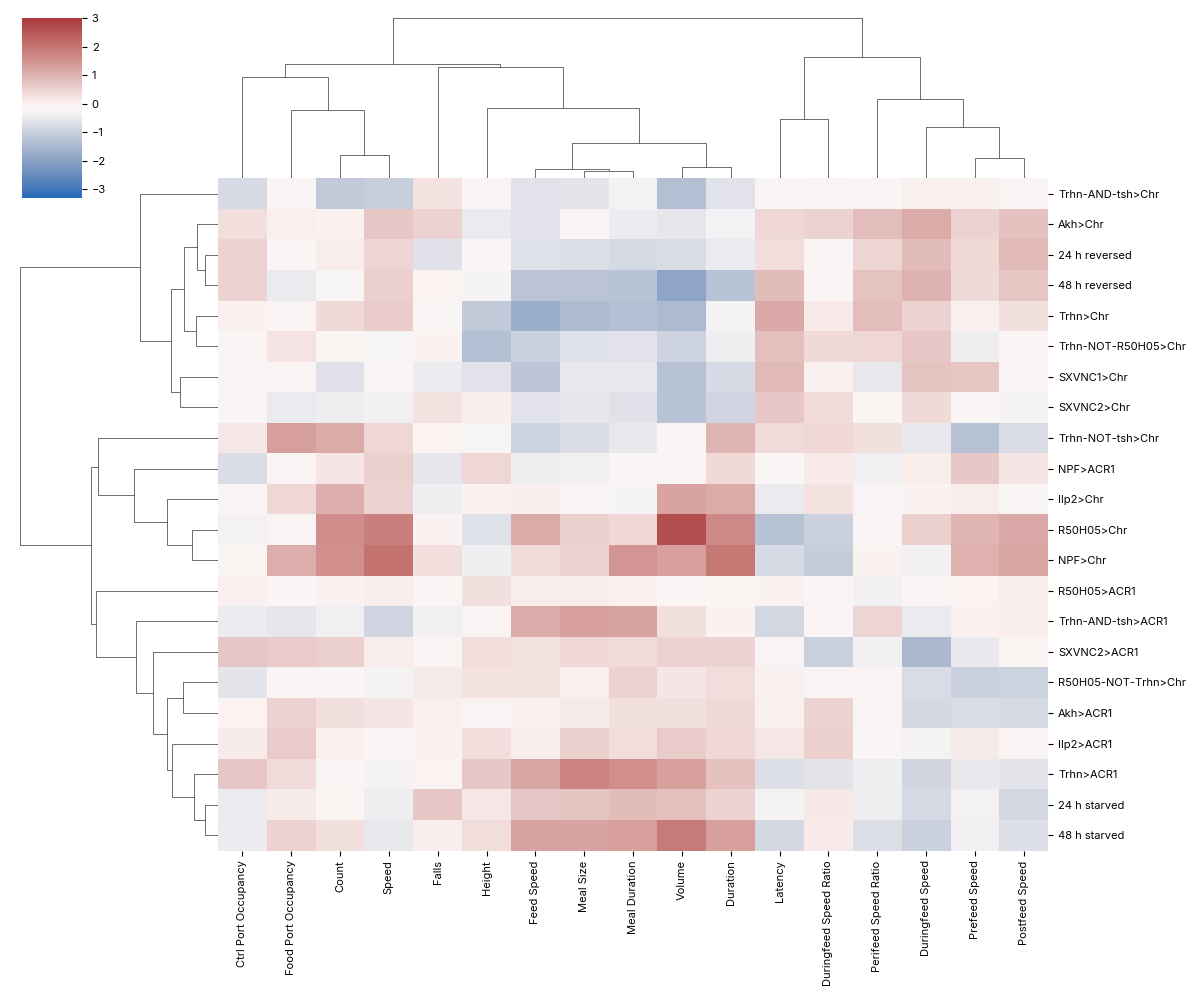

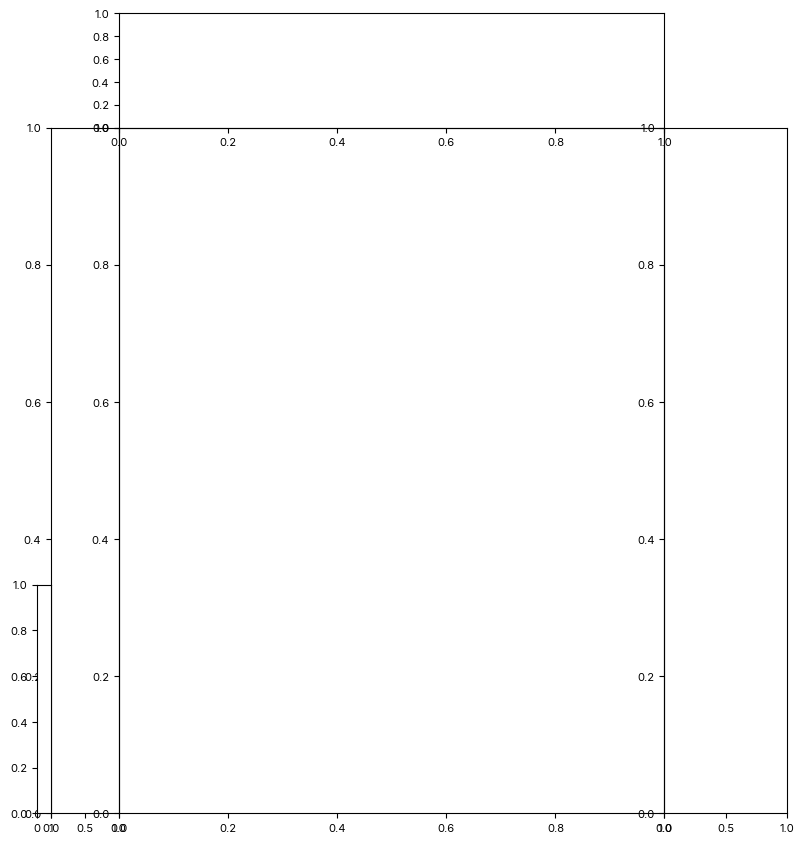

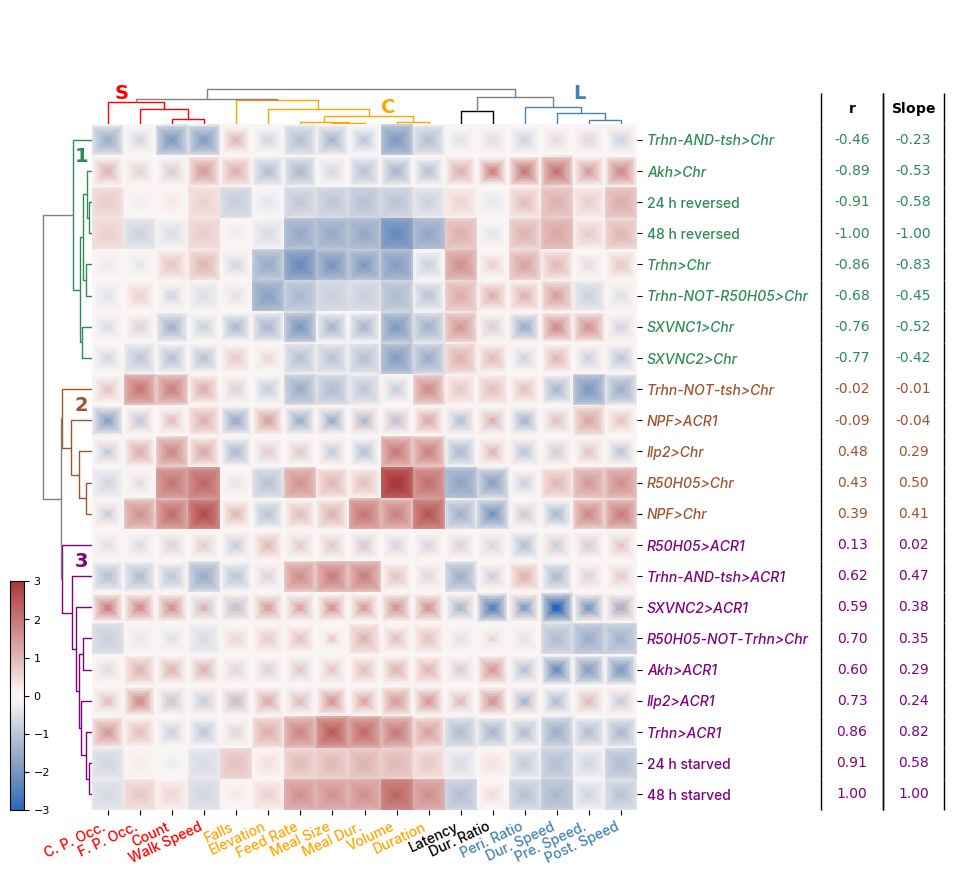

<Figure size 640x480 with 0 Axes>

In [59]:
setFont('inter', 8)


from scipy.cluster import hierarchy
fclu = sns.clustermap(gDf, cmap='vlag',
               method = 'average',
               metric = 'correlation', 
               figsize=(12, 10), vmin=3, vmax=-3);
newind = fclu.dendrogram_row.reordered_ind
contrasts_new = [contrasts[i] for i in newind]
delta_types_new =  [deltaType[i] for i in newind]
contrasts_df = pd.DataFrame(data = np.array(contrasts).tolist(),columns  = vectorselection, index = gDf.index)
delta_types_df = pd.DataFrame(np.array([deltaType for i in range(len(vectorselection))]).T, columns = vectorselection,  index= gDf.index)
vectorselection_arr = [vectorselection[i] for i in fclu.dendrogram_col.reordered_ind]
expt_arr = [gDf.index[i] for i in fclu.dendrogram_row.reordered_ind]
delta_types_df_arr = rearrange_dataframe(delta_types_df, vectorselection_arr, expt_arr)
contrasts_df_arr = rearrange_dataframe(contrasts_df, vectorselection_arr, expt_arr)
Zy = hierarchy.linkage(gDf, method = 'average', metric = 'correlation');
Zx = hierarchy.linkage(gDf.T, method = 'average',  metric = 'correlation');
# Zy_ = [Zy[len(Zy)-i-1] for i in range(len(Zy))]
f = plt.figure(figsize=(7.5, 8));
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(3, 4,  width_ratios=(.1, .5, 4, .9), height_ratios=(1, 4, 2),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0, hspace=0);
# Create the Axes.
ax = f.add_subplot(gs[1:, 2]);
ax_denx = f.add_subplot(gs[0, 2]);
ax_deny = f.add_subplot(gs[1:, 1]);
cax = f.add_subplot(gs[2, 0]);
tax = f.add_subplot(gs[1:, 3]);
tax.patch.set_alpha(0.01)
ax.patch.set_alpha(0.01)
ax_denx.patch.set_alpha(0.01)
ax_deny.patch.set_alpha(0.01)

%run spiral_heatmap.ipynb

sp, mean = spiral_heatmap_ind(contrasts_df_arr, 21, 
                         expt_arr, vectorselection_arr,
                                            reverse_neg = False,   abs_rank = True,  chop_tail = 2.5, 
                                            delta_type = delta_types_df_arr, ax =ax);

plt.gcf().subplots_adjust(left = 0.1, bottom=0.7)
hierarchy.set_link_color_palette(['red', 'orange',  'k', 'steelblue'])
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zx, ax = ax_denx,above_threshold_color='gray',color_threshold=.88,
                               );
xcolors = dn['leaves_color_list']
metriccolors = pd.DataFrame(xcolors, index = vectorselection_arr, columns = ['cluster color'])
metriccolors['index'] = range(len(xcolors))


groupcolors = ['purple','sienna', 'seagreen']

hierarchy.set_link_color_palette(groupcolors)
with plt.rc_context({'lines.linewidth': 1}):
    dn = hierarchy.dendrogram(Zy, ax = ax_deny, above_threshold_color='gray',color_threshold=.90, orientation = 'left',distance_sort='descending'
                              );
ycolors = dn['leaves_color_list']
ycolors.reverse()
clustercolors = pd.DataFrame(ycolors, index = expt_arr, columns = ['cluster color'])
clustercolors['index'] = range(len(ycolors))
ax_denx.text(7, .9, 'S', weight = 'bold', color = 'red', fontsize = 14)
ax_denx.text(90, .4, 'C', weight = 'bold', color = 'orange', fontsize = 14)
ax_denx.text(150, .9, 'L', weight = 'bold', color = 'steelblue', fontsize = 14)
ax_denx.set_ylim(0, 4)
ax_denx.set_xlim(0, 10*len(vectorselection_arr))
ax_denx.set_yticks([])
ax_denx.set_xticks([])
ax_denx.set_frame_on(False) 

ax_deny.text(.5, 208, '1', weight = 'bold', color = groupcolors[2], fontsize = 14)
ax_deny.text(.5, 128, '2', weight = 'bold', color = groupcolors[1], fontsize = 14)
ax_deny.text(.5, 78, '3', weight = 'bold', color = groupcolors[0], fontsize = 14)

ax_deny.set_ylim(0, 10*len(expt_arr))
ax_deny.set_xlim(2,0)
ax_deny.set_yticks([])
ax_deny.set_xticks([])
ax_deny.set_frame_on(False) 
# ax.set_aspect('equal')
ax.yaxis.tick_right()
ax.set_yticklabels(ax.get_yticklabels(), font = 'inter', ha = 'left', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), font = 'inter', fontsize = 10)

ylabels = ax.get_yticklabels()
# Change color of specific labels (e.g., first and last)
for i in range(len(ylabels)):
    ylabels[i].set_color(clustercolors.loc[ylabels[i].get_text()]['cluster color'])

ax.set_yticklabels(ylabels, weight = 'medium')
xlabels = ax.get_xticklabels()
# Change color of specific labels (e.g., first and last)
for i in range(len(xlabels)):
    xlabels[i].set_color(metriccolors.loc[xlabels[i].get_text()]['cluster color'])
    xlabels[i].set_text(metricAbb.loc[xlabels[i].get_text(), 'Abb'])
ax.set_xticklabels(xlabels, weight = 'medium')
xtl = ax.get_yticklabels()    
for x in xtl:
    if '>' in x.get_text():
        x.set_style('italic')   

tax.set_yticks([])
tax.set_xticks([])
tax.set_frame_on(False) 

setFont('IBMPlexMono-Regular', 10)
tablevalues = statsDf.loc[expt_arr, ['r_str', 'Slope_str']].values.tolist()
tablevalues
rtable = tax.table( cellText=tablevalues,
            colWidths=[0.10, .10],
            colLabels = ['$\\bf{r}$', '$\\bf{Slope}$'], colColours = ['lightgray', 'lightgray'], edges = 'vertical',
            rowLabels=None, loc = 'center',cellLoc='center',
          bbox=[1.5, 0, 1, 1.045])
rtable.auto_set_font_size(False)
rtable.set_fontsize(10)
for i in clustercolors['index']:
    cell1 = rtable[i+1,1]
    cell1.get_text().set_color(clustercolors.iloc[i]['cluster color'])
    cell2 = rtable[i+1,0]
    cell2.get_text().set_color(clustercolors.iloc[i]['cluster color'])

f.subplots_adjust(hspace=0)
f.colorbar(ax.get_children()[0], cax=cax, orientation="vertical", shrink = 0.1, pad = 1000)
f

In [42]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/Users/sangyuxu/Library/Fonts/Inter-SemiBold.ttf',
 '/opt/X11/share/system_fonts/Apple Symbols.ttf',
 '/Users/sangyuxu/Library/Fonts/Inter-MediumItalic.ttf',
 '/System/Library/Fonts/SFCompactItalic.ttf',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf',
 '/opt/X11/share/system_fonts/NotoSansArmenian.ttc',
 '/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc',
 '/opt/X11/share/system_fonts/ヒラギノ角ゴシック W3.ttc',
 '/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Microsoft Sans Serif.ttf',
 '/opt/X11/share/system_fonts/SFHebrew.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Courier New Italic.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Farisi.ttf',
 '/opt/X11/share/system_fonts/Avenir.ttc',
 '/System/Library/Fonts/Supplemental/Gurmukhi.ttf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc',
 '/opt/X

findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found because none of the following families were found: IBMPlexMono-Regular
findfont: Generic family 'sans-serif' not found 

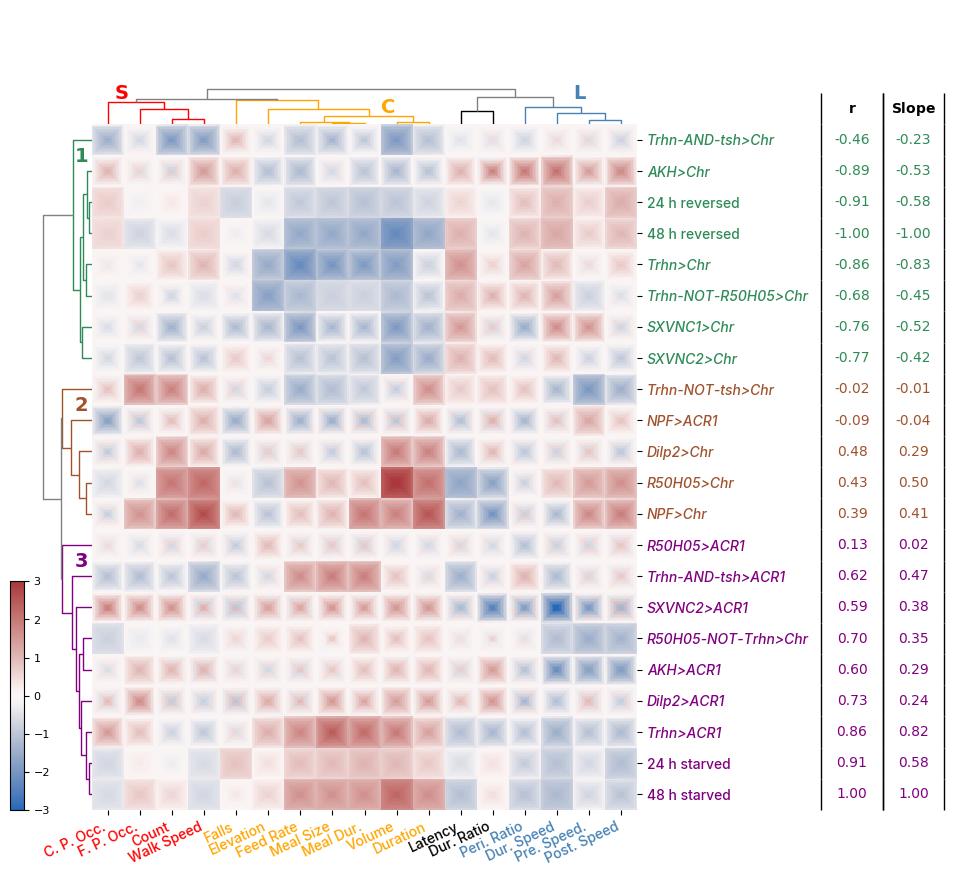

In [43]:
f

In [54]:
statsDf.loc[expt_arr,  'r'].map("{:.2f}".format)

Trhn-AND-tsh>Chr       -0.46
AKH>Chr                -0.89
24 h reversed          -0.91
48 h reversed          -1.00
Trhn>Chr               -0.86
Trhn-NOT-R50H05>Chr    -0.68
SXVNC1>Chr             -0.76
SXVNC2>Chr             -0.77
Trhn-NOT-tsh>Chr       -0.02
NPF>ACR1               -0.09
Ilp2>Chr                0.48
R50H05>Chr              0.43
NPF>Chr                 0.39
R50H05>ACR1             0.13
Trhn-AND-tsh>ACR1       0.62
SXVNC2>ACR1             0.59
R50H05-NOT-Trhn>Chr     0.70
AKH>ACR1                0.60
Ilp2>ACR1               0.73
Trhn>ACR1               0.86
24 h starved            0.91
48 h starved            1.00
Name: r, dtype: object

In [61]:
f_correlation = f
f_correlation.savefig(figurepath+"/ClusterCorrelation.svg", bbox_inches = 'tight')
f_correlation.savefig(figurepath+"/ClusterCorrelation.png", dpi = 300, bbox_inches = 'tight')

In [31]:
xlabels

[Text(10.5, 0, 'C. P. Occ.'),
 Text(31.5, 0, 'F. P. Occ.'),
 Text(52.5, 0, 'Count'),
 Text(73.5, 0, 'Walk Speed'),
 Text(94.5, 0, 'Falls'),
 Text(115.5, 0, 'Elevation'),
 Text(136.5, 0, 'Feed Rate'),
 Text(157.5, 0, 'Meal Size'),
 Text(178.5, 0, 'Meal Dur.'),
 Text(199.5, 0, 'Volume'),
 Text(220.5, 0, 'Duration'),
 Text(241.5, 0, 'Latency'),
 Text(262.5, 0, 'Dur. Ratio'),
 Text(283.5, 0, 'Peri. Ratio'),
 Text(304.5, 0, 'Dur. Speed'),
 Text(325.5, 0, 'Pre. Speed.'),
 Text(346.5, 0, 'Post. Speed')]

In [64]:
r**2

0.7445490058129746

0.7312749883351419 0.20505837521118692 0.8154606531956851 6.625304086032552e-05 0.1340201159234722


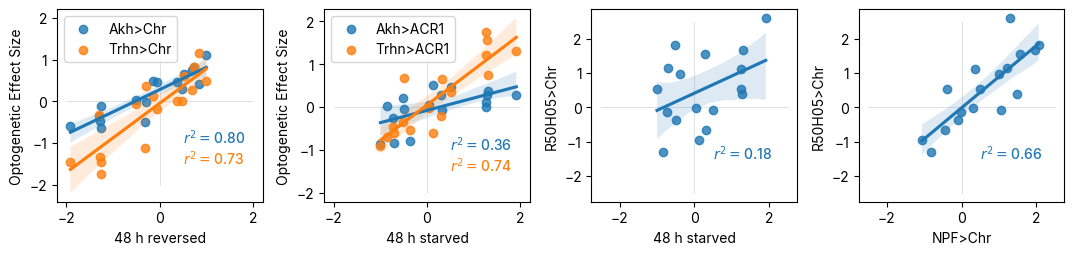

In [63]:
f, axes = plt.subplots(1, 4)
f.set_size_inches(13, 2.5)
f.subplots_adjust(wspace = .3)
setFont('inter', 10)
axes.flatten()[0].plot([-2, 2], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes.flatten()[0].plot([0, 0], [-2, 2], 'lightgray', linewidth = .5, zorder = 0)
axes.flatten()[0].text(0.5, -1.5, '$r^{2} = $'+ (statsDf.loc[expt_arr,  'r']**2).map("{:.2f}".format)['Trhn>Chr'], color = '#ff7f0e', weight = 'medium')
axes.flatten()[0].text(0.5, -1, '$r^{2} = $'+ (statsDf.loc[expt_arr,  'r']**2).map("{:.2f}".format)['Akh>Chr'], color = '#1f77b4', weight = 'medium')
sns.regplot( x = gDf.loc['48 h reversed'], y = gDf.loc['Akh>Chr'], label = 'Akh>Chr', ax = axes.flatten()[0])
sns.regplot( x = gDf.loc['48 h reversed'], y = gDf.loc['Trhn>Chr'],  label = 'Trhn>Chr', ax = axes.flatten()[0])
axes.flatten()[0].legend()
axes.flatten()[0].set_ylabel('Optogenetic Effect Size')



axes.flatten()[1].plot([-2, 2], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes.flatten()[1].plot([0, 0], [-2, 2], 'lightgray', linewidth = .5, zorder = 0)
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Trhn>ACR1'])
axes.flatten()[1].text(0.5, -1.5, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#ff7f0e', weight = 'medium')
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Akh>ACR1'])
axes.flatten()[1].text(0.5, -1, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#1f77b4', weight = 'medium')
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Akh>ACR1'], label = 'Akh>ACR1', ax = axes.flatten()[1])
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn>ACR1'], label = 'Trhn>ACR1', ax = axes.flatten()[1])
axes.flatten()[1].legend()
axes.flatten()[1].set_ylabel('Optogenetic Effect Size')


axes.flatten()[2].plot([-2.5, 2.5], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes.flatten()[2].plot([0, 0], [-2.5, 2.5], 'lightgray', linewidth = .5, zorder = 0)
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['R50H05>Chr'], label = 'R50H05>Chr', ax = axes.flatten()[2])
# sns.regplot( x = gDf.loc['NPF>Chr'], y = gDf.loc['Dilp2>Chr'], label = 'Dilp2>Chr', ax = axes[2])
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['R50H05>Chr'], gDf.loc['48 h starved'])
axes.flatten()[2].text(0.5, -1.5, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#1f77b4', weight = 'medium')
# axes[2].legend()
# axes[2].set_ylabel('Optogenetic Effect Size')


axes.flatten()[3].plot([-2.5, 2.5], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes.flatten()[3].plot([0, 0], [-2.5, 2.5], 'lightgray', linewidth = .5, zorder = 0)
sns.regplot( x = gDf.loc['NPF>Chr'], y = gDf.loc['R50H05>Chr'], label = 'R50H05>Chr', ax = axes.flatten()[3])
# sns.regplot( x = gDf.loc['NPF>Chr'], y = gDf.loc['Dilp2>Chr'], label = 'Dilp2>Chr', ax = axes[2])
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['R50H05>Chr'], gDf.loc['NPF>Chr'])
print(Slope, Intercept, r, p, std_err)
axes.flatten()[3].text(0.5, -1.5, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#1f77b4', weight = 'medium')
# axes[2].legend()
# axes[2].set_ylabel('Optogenetic Effect Size')
f.savefig(figurepath+"/scatter1.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/scatter1.png", dpi = 300, bbox_inches = 'tight')


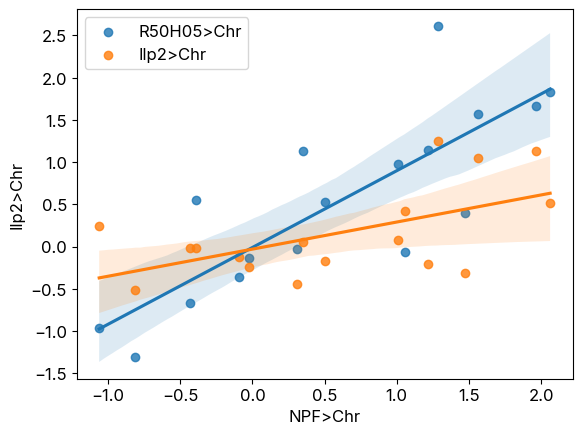

In [44]:
sns.regplot( x = gDf.loc['NPF>Chr'], y = gDf.loc['R50H05>Chr'], label = 'R50H05>Chr')
sns.regplot( x = gDf.loc['NPF>Chr'], y = gDf.loc['Dilp2>Chr'], label = 'Ilp2>Chr')
plt.ylabel('Ilp2>Chr')
plt.legend()

##### 

In [75]:
from svgutils.compose import *

Figure("20cm", "28cm", 
    Panel(SVG('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/metricForest.svg').scale(0.028),
    Text("A", 0, 0.5, size=0.5, font = 'inter', weight='bold'), 
    Text("D", 0, 11, size=0.5, font = 'inter', weight='bold')
         ).move(.5, 0),
    Panel(SVG(figurepath + 'Trhntransgenic_ribbon_xaxis.svg').scale(0.020),
    Text("B", 1, .5, size=0.5, font = 'inter', weight='bold') ).move(-0.5, 6),
    Panel(SVG(figurepath + 'R50H05transgenic_ribbon_xaxis.svg').scale(0.020),
    Text("C", 1, .5, size=0.5, font = 'inter', weight='bold') ).move(9.5, 6),

    # Panel(SVG(figurepath + 'ClusterCorrelation.svg').scale(0.025),
    # Text("B", 0, 2, size=0.5, font = 'inter', weight='bold') ).move(0.2, 7.5),
    ).save(figurepath+"/Figure5_Correlation.svg")



# Figure("24cm", "30cm", 
#     Panel(SVG(figurepath + 'ClusterEuclidean.svg').scale(0.03),
#     Text("a", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 1),
#     Panel(SVG(figurepath + 'corrMatrix.svg').scale(0.016),
#     Text("b", 0.2, 0.02, size=0.3, font = 'inter', weight='bold') ).move(1, 15.5),
#     ).save(figurepath+"/Figure5_Euclidean.svg")


In [65]:
npfcschpalette = {'npf-gal4>uas-cschrimson':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; npf-gal4':'k'}
akhcschpalette = {'akh3-gal4>uas-csch':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; akh3-gal4':'k'}
dilp2cschpalette = {'il2-gal4>uas-cschrimson':'orangered', 'w1118; uas-cschrimson':'gray', 'w1118; il2-gal4':'k'}
npfacrpalette = {'npf-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; npf-gal4':'k'}
akhacrpalette = {'akh2-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; akh2-gal4':'k'}
dilp2acrpalette = {'dilp2-gal4>uas-acr1':'seagreen', 'w1118; uas-acr1':'gray', 'w1118; dilp2-gal4':'k'}



In [66]:
metameta = fullMetaData.loc[fullMetaData['Group'] == 'metaReview']
metameta
palettes = [npfcschpalette,npfacrpalette,  akhcschpalette,  akhacrpalette, dilp2cschpalette, dilp2acrpalette]


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 51.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 15.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 7.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

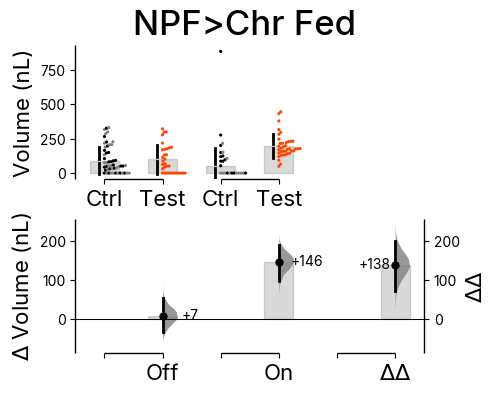

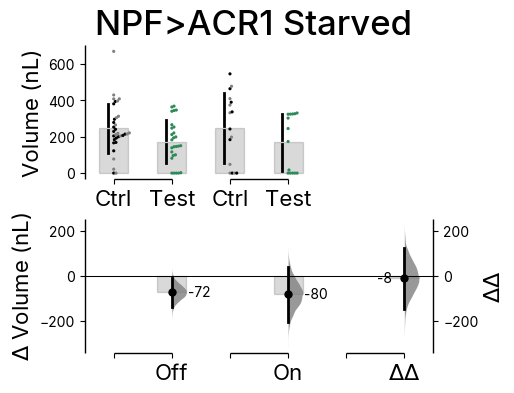

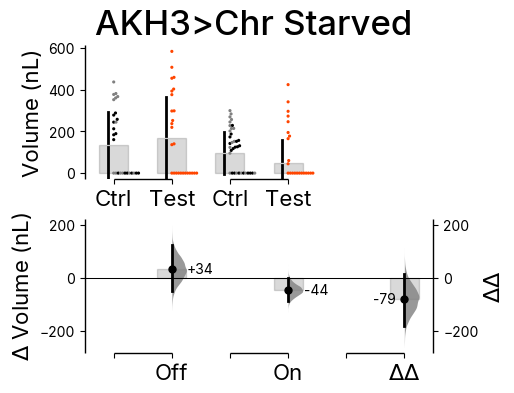

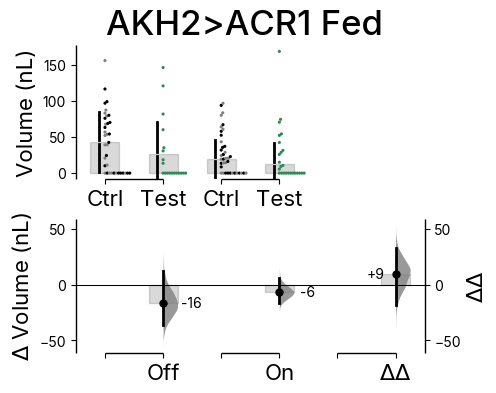

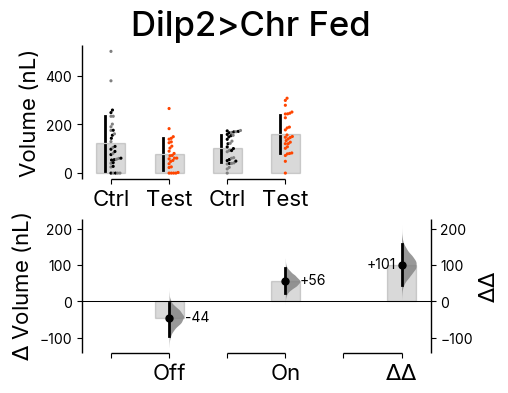

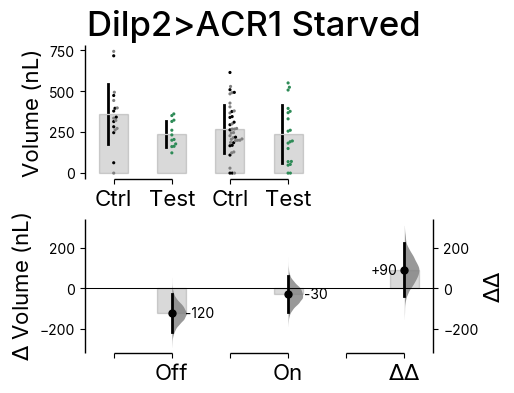

In [67]:
contrastTextFontSize = 16

for i in metameta.index.values:
    data = pd.read_csv(picklepath + metameta.loc[i, 'File']).sort_values(by = ['Status', 'Light'])
    data['Volume'] = data['Volume']*1000
    contrast = dabest.load(data, x = ['Status', 'Genotype'], y =  'Volume', delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = contrast.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},raw_marker_size=0.4, es_marker_size= 5, swarm_desat = 1,
                                custom_palette= palettes[i - 13], 
                                fig_size=(4.5, 4),
                                # swarm_ylim= [-10, 800], 
                                  swarm_label='Volume (nL)', contrast_label= '$\Delta$ Volume (nL)', delta2_label= '$\Delta\Delta$', 
                                  fontsize_contrastxlabel=contrastTextFontSize, 
                                   fontsize_contrastylabel= contrastTextFontSize, 
                                   fontsize_delta2label=contrastTextFontSize,
                                   fontsize_rawxlabel=contrastTextFontSize, 
                                   fontsize_rawylabel=contrastTextFontSize,
                                  delta_text = True,
                               )
    f.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
    f.axes[1].get_children()[17].set_text(f.axes[1].get_children()[17].get_text()[0:-3])
    f.axes[1].get_children()[18].set_text(f.axes[1].get_children()[18].get_text()[0:-3])
    f.axes[1].get_children()[19].set_text(f.axes[1].get_children()[19].get_text()[0:-3])

    f.suptitle(metameta.loc[i, 'Expt'] + ' ' + metameta.loc[i, 'State'], weight = 'medium',fontsize = 25, 
               # color= 'orange',
               y=.97)
    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.savefig(figurepath+ metameta.loc[i, 'Expt']+'_Vcontrast.svg')


In [69]:
wtgBaseline = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure1/wtgBaseline.csv')
wtgBaseline = wtgBaseline.sort_values(by = 'M48', ascending = False).reset_index(drop = True)
wtgBaseline
write_results_table(SPREADSHEET_ID, 'Figure S6C-F', wtgBaseline, sheet = 'Figure S6', starting_row = None)


166


In [20]:
contrasts_rearr48rank

NameError: name 'contrasts_rearr48rank' is not defined

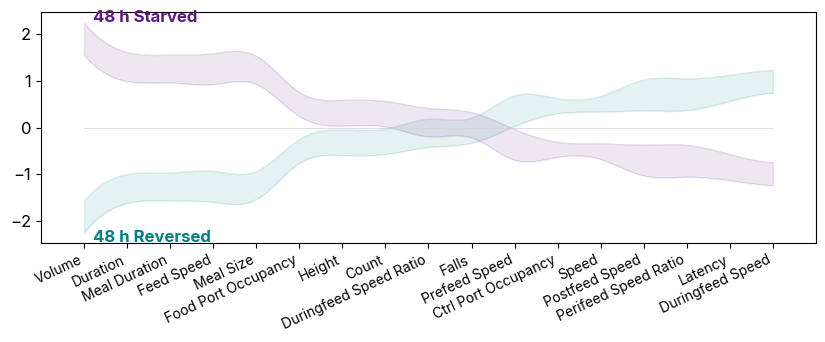

In [70]:
def prepWTbackground():
    setFont('inter', 12)
    def smooth_ribbon(x, y_l, y_h, color = 'steelblue', label = None, no_of_points = 200, ax = ax):
        from scipy.interpolate import interp1d
        x_smooth = np.linspace(x.min(), x.max(), no_of_points)
        y_h_smooth = interp1d(x, y_h, kind='cubic')(x_smooth)
        y_l_smooth = interp1d(x, y_l, kind='cubic')(x_smooth)
        ax.fill_between(x_smooth, y_l_smooth, y_h_smooth, 
                        alpha=0.1, color=color,
                        label=label)
        ax.plot(x_smooth, y_h_smooth, '-', color = color, alpha=0.2, linewidth = .2)
        ax.plot(x_smooth, y_l_smooth, '-', color = color, alpha=0.2, linewidth = .2)
    f, axes = plt.subplots(1, 1)
    axes.plot([1, len(wtgBaseline.index)], [0, 0], 'lightgray', linewidth = .5)
    f.set_size_inches(10, 3)
    smooth_ribbon(wtgBaseline.index+1, 0-wtgBaseline['H48'], 0-wtgBaseline['L48'], color = 'teal',  ax = axes)
    smooth_ribbon(wtgBaseline.index+1, wtgBaseline['H48'], wtgBaseline['L48'], color = sns.color_palette("magma")[1], ax = axes)
    axes.set_xticks(wtgBaseline.index+1, wtgBaseline['Metric'],rotation = 25, ha = 'right', fontsize = 10)
    axes.text(1.2, -2.2, '48 h Reversed',fontweight = 'bold', ha = 'left', va = 'top', color = 'teal')
    axes.text(1.2, 2.2, '48 h Starved', fontweight = 'bold', ha = 'left', va = 'bottom',color = sns.color_palette("magma")[1])
    axes.set_xlim(0, 18)
    return f, axes
f, axes = prepWTbackground()


In [71]:
contrasts_df_T.iloc[0, 0]

DABEST v2024.03.29
                  
Good afternoon!
The current time is Tue Feb 11 14:37:39 2025.

Effect size(s) with 95% confidence intervals will be computed for:
1. Red Light On Ctrl minus Red Light Off Ctrl
2. Red Light On Test minus Red Light Off Test
3. Test minus Ctrl (only for mean difference)

5000 resamples will be used to generate the effect size bootstraps.

1
121
127
0
133
139
4
145
151
12
157
163
14
169
175
16
181
187


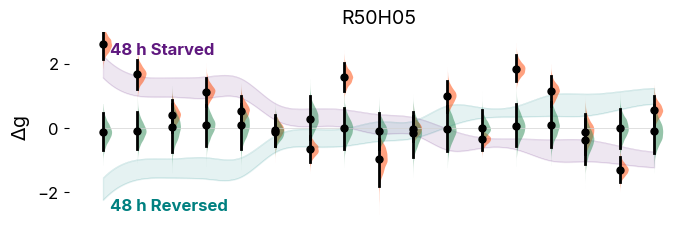

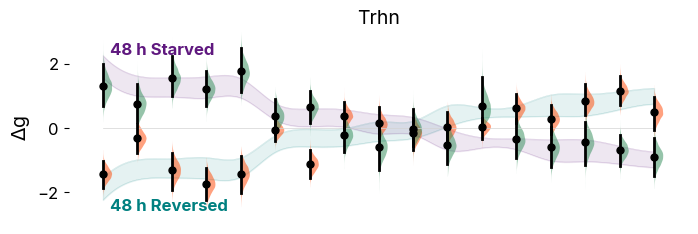

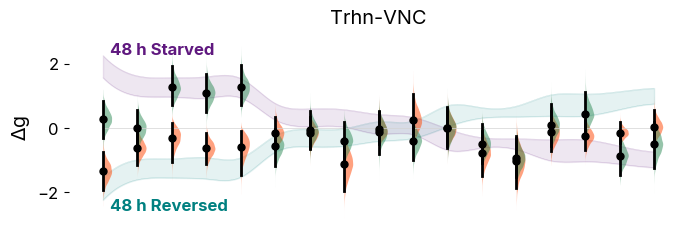

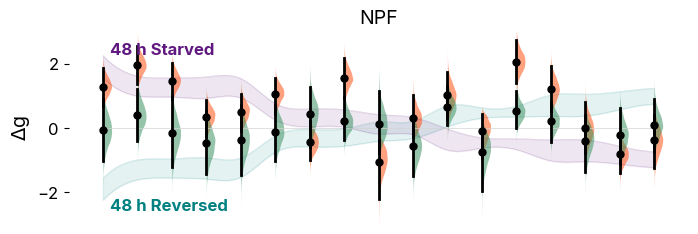

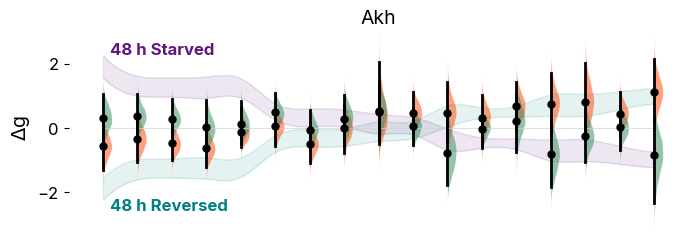

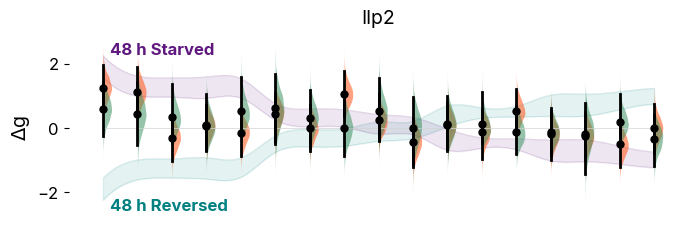

In [72]:
pairstodo = [[1, 3], [0, 2], [4, 5],[12, 13 ], [14, 15 ], [16, 17 ]]
contrasts_df_T = contrasts_df.T

for i in pairstodo:
    f, axes = prepWTbackground()
    print(i[0])
    for transgene in contrasts_df_T.columns[[i[0]]]:
        contrasts_df_T = contrasts_df_T.loc[wtgBaseline.Metric]
        cs = contrasts_df_T.loc[:, transgene]
        from dabest.forest_plot import forest_plot
        forest_plot(cs.values.tolist(), contrast_labels =contrasts_df_T.index, 
                    effect_size='delta_g', title=transgene.split('>')[0], 
                    ax = axes,alpha_violin_plot=.5, ci_line_width=2, marker_size=10,ylabel='$\Delta$g'
                   )
        [v.set_facecolor('orangered') for v in axes.get_children()[9:26]]
        forestTable = pd.DataFrame([[c.delta_g.delta_delta.difference for c in cs.values.tolist()], 
                                [c.delta_g.delta_delta.bca_low for c in cs.values.tolist()], 
                                [c.delta_g.delta_delta.bca_high for c in cs.values.tolist()]],
                               index = ['mean 24', 'bca_low 24', 'bca_high 24'], columns = contrasts_df_T.index
                              )
        forestTable.insert(0, '', forestTable.index)        
        write_results_table(SPREADSHEET_ID,'Figure 5 ' + transgene,forestTable, sheet = 'Figure 5', starting_row = None, ) 

    for transgene in contrasts_df_T.columns[[i[1]]]:
        contrasts_df_T = contrasts_df_T.loc[wtgBaseline.Metric]
        cs = contrasts_df_T.loc[:, transgene]
        from dabest.forest_plot import forest_plot
        forest_plot(cs.values.tolist(), contrast_labels =contrasts_df_T.index, 
                    effect_size='delta_g', title=transgene.split('>')[0], 
                    ax = axes,alpha_violin_plot=.5, ci_line_width=2, marker_size=10,ylabel='$\Delta$g',fontsize=14,
                   )
        [v.set_facecolor('seagreen') for v in axes.get_children()[60:77]]
        forestTable = pd.DataFrame([[c.delta_g.delta_delta.difference for c in cs.values.tolist()], 
                                [c.delta_g.delta_delta.bca_low for c in cs.values.tolist()], 
                                [c.delta_g.delta_delta.bca_high for c in cs.values.tolist()]],
                               index = ['mean 24', 'bca_low 24', 'bca_high 24'], columns = contrasts_df_T.index
                              )
        forestTable.insert(0, '', forestTable.index)        
        write_results_table(SPREADSHEET_ID,'Figure 5 ' + transgene,forestTable, sheet = 'Figure 5', starting_row = None, ) 

    axes.set_xticks([])
    if axes.get_title() == 'AKH2':
        transgene = 'AKH'
        axes.set_title(transgene)
    if i == [4, 5]:
        transgene = 'Trhn-VNC'
        axes.set_title(transgene)

    # if i ==[16, 17] or i == [4, 5]:
    # axes.set_xticks(wtgBaseline.index+1, metricAbb.loc[wtgBaseline['Metric']]['Abb'].values,rotation = 25, ha = 'right', fontsize = 10)
    axes.set_ylim(-3, 3)
    f.set_size_inches(8, 2.5)
    f.savefig(figurepath + transgene.split('>')[0] + 'transgenic_ribbon.png', dpi = 300)
    f.savefig(figurepath + transgene.split('>')[0] + 'transgenic_ribbon.svg', dpi = 300)




In [ ]:
contrasts_rearr48rank

In [ ]:
from svgutils.compose import *

Figure("18cm", "24cm", 
    Panel(SVG(figurepath + 'NPF>Chr_Vcontrast.svg').scale(0.025),
    Text("A", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(0, 0),
    Panel(SVG(figurepath + 'NPF>ACR1_Vcontrast.svg').scale(0.025),
    Text("B", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 0),
    Panel(SVG(figurepath + 'AKH3>Chr_Vcontrast.svg').scale(0.025),
    Text("C", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(0, 8),
    Panel(SVG(figurepath + 'AKH2>ACR1_Vcontrast.svg').scale(0.025),
    Text("D", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 8),
    Panel(SVG(figurepath + 'Dilp2>Chr_Vcontrast.svg').scale(0.025),
    Text("E", 0,.5, size=0.6, font = 'inter', weight='bold') ).move(0, 16),
    Panel(SVG(figurepath + 'Dilp2>ACR1_Vcontrast.svg').scale(0.025),
    Text("F", 0, .5, size=0.6, font = 'inter', weight='bold') ).move(9, 16),
    ).save(figurepath+"/FigSuppMeta.svg")



In [73]:
from svgutils.compose import *

Figure("24cm", "26cm", 
    Panel(SVG(figurepath + 'corrMatrix_48.svg').scale(0.028),
    Text("A", 0.5, 0, size=0.5, font = 'inter', weight='bold'),
    Text("B", 12, 0, size=0.5, font = 'inter', weight='bold') ).move(0, 1),
    Panel(SVG(figurepath + 'Trhntransgenic_ribbon.svg').scale(0.023),
    Text("C", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(0, 6.5),
    Panel(SVG(figurepath + 'R50H05transgenic_ribbon.svg').scale(0.023),
    Text("D", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 6.5),
    Panel(SVG(figurepath + 'Trhn-VNCtransgenic_ribbon.svg').scale(0.023),
    Text("E", 0.5,.5, size=0.5, font = 'inter', weight='bold') ).move(0, 11),
    Panel(SVG(figurepath + 'AKHtransgenic_ribbon.svg').scale(0.023),
    Text("F", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 10.5),
    Panel(SVG(figurepath + 'NPFtransgenic_ribbon.svg').scale(0.023),
    Text("G", 0.5, .5, size=0.5, font = 'inter', weight='bold') ).move(0, 14.5),
    Panel(SVG(figurepath + 'Dilp2transgenic_ribbon.svg').scale(0.023),
    Text("H", 0.5,.5, size=0.5, font = 'inter', weight='bold') ).move(11.5, 14.5),
    Panel(SVG(figurepath + 'scatter1.svg').scale(0.028),
    Text("I", 0.5,0, size=0.5, font = 'inter', weight='bold'),
    Text("J", 6, 0, size=0.5, font = 'inter', weight='bold'),
    Text("K", 11.5, 0, size=0.5, font = 'inter', weight='bold'),
    Text("L", 17, 0, size=0.5, font = 'inter', weight='bold')
         ).move(1, 20),
    ).save(figurepath+"/FigSuppMetaRibbon.svg")



In [ ]:
contrasts_rearr48rank.columns[[1, 3]]

In [ ]:
axes.get_children()[6:22]